YOLO_WORLD (с открытым словарным запасом в режиме реального времени, основанный на Ultralytics YOLOv8.)

In [8]:
from ultralytics import YOLOWorld
import time
import torch


Mini test 


In [11]:
model = YOLOWorld("yolov8s-world.pt")


model.set_classes(["logs in car"])

results = model.predict("/Users/margogusarova/Documents/DL_workspace/Search_model/img/4.jpg")

results[0].show()


image 1/1 /Users/margogusarova/Documents/DL_workspace/Search_model/img/4.jpg: 480x640 (no detections), 455.7ms
Speed: 18.7ms preprocess, 455.7ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)


In [113]:
import torch
import time
import numpy as np
import plotly.express as px
import random
from typing import List, Dict, Optional
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image

In [ ]:
def random_named_css_colors(num_colors: int) -> List[str]:
    """
    Returns a list of randomly selected named CSS colors.

    Args:
    - num_colors (int): Number of random colors to generate.

    Returns:
    - list: List of randomly selected named CSS colors.
    """
    
    named_css_colors = [
        'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond',
        'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
        'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey',
        'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
        'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
        'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite',
        'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory',
        'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow',
        'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray',
        'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine',
        'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
        'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive',
        'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip',
        'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown',
        'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey',
        'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
        'whitesmoke', 'yellow', 'yellowgreen'
    ]

   
    return random.sample(named_css_colors, min(num_colors, len(named_css_colors)))

Функция для colab 

In [ ]:
def plot_detections_plotly(image: np.ndarray,
                           detections: List,
                           class_colors: Optional[Dict[str, str]] = None) -> None:
    """
    Function to display detections and masks on an image.

    :param image: The image (numpy array)
    :param detections: A list of detections, where each detection contains a bbox and a mask
    :param class_colors: Colors for the classes (if not provided, they will be generated randomly)
    """

    if class_colors is None:
        num_detections = len(detections)
        colors = random_named_css_colors(num_detections)
        class_colors = {}
        for i in range(num_detections):
            class_colors[i] = colors[i]

   
    fig = go.Figure()

    
    fig.add_trace(go.Image(z=image))

    
    for i, det in enumerate(detections):
        
        class_name = det['class']  
        bbox = det['bbox']  

        x_center, y_center, width, height = bbox[0].cpu().numpy()  
        x1 = x_center - width / 2
        y1 = y_center - height / 2
        x2 = x_center + width / 2
        y2 = y_center + height / 2
        mask = det['mask']  


        
        fig.add_trace(go.Scatter(x=[x1, x2, x2, x1, x1],
                                y=[y1, y1, y2, y2, y1],
                                fill='toself',
                                fillcolor=class_colors[i % len(class_colors)],
                                opacity=0.5,
                                line=dict(color='black', width=2),
                                mode='lines'))

       
        if mask is not None:
            fig.add_trace(go.Scatter(x=mask[:, 0], y=mask[:, 1],
                                     mode='markers', marker=dict(size=5, color=class_colors[i], opacity=0.4)))

    
    fig.update_layout(title="Обнаруженные объекты и маски",
                      xaxis=dict(scaleanchor="y", constrain='domain'),
                      yaxis=dict(scaleanchor="x", constrain='domain'),
                      showlegend=False)

    fig.show()


Основное исследование


In [ ]:
def YOLO_world_det(image_path,labels):
  model = YOLOWorld("yolov8m-worldv2.pt")
  model.set_classes(labels)

  device = "cuda" if torch.cuda.is_available() else "cpu"
  print(f"Used device: {device}")

  image_path = image_path

  start_time = time.time()
  results = model.predict(image_path)
  end_time = time.time()

  inference_time = end_time - start_time
  print(f"Time of interface: {inference_time:.4f} секунд на {device}")

  
  results[0].show()
  image = np.array(results[0].plot())
  output_path = f"results/det_res.png"
  plt.imsave(output_path, image)

  img = Image.open(output_path)
  display.display(img)

  
  if device == "cuda":
      memory_used = torch.cuda.memory_allocated() / 1e6
      memory_reserved = torch.cuda.memory_reserved() / 1e6
      print(f"Used memmory GPU: {memory_used:.2f} MB")
      print(f"Reserved memory GPU: {memory_reserved:.2f} MB")

  if device == "cuda" or device == "cpu":
      print("Tangle to CPU")
      model = YOLOWorld("yolov8m-worldv2.pt")
      model.set_classes(["stone", "ball"])
      model.to("cpu")

      
      start_time_cpu = time.time()
      results_cpu = model.predict(image_path)
      end_time_cpu = time.time()

      cpu_inference_time = end_time_cpu - start_time_cpu
      print(f"Time of interface on CPU: {cpu_inference_time:.4f} sk")


  
  detections = results[0].boxes 
  
  masks = results[0].masks 

  
  detection_results = []
  for i, det in enumerate(detections):
      detection_results.append({
          'class': det.cls,  
          'bbox': det.xywh,  
          'mask': masks[i] if masks is not None else None  
      })

  print("\nResult:")
  print(f"- Time of interface GPU: {inference_time:.4f} sk")
  if device == "cuda":
      print(f"- Used memmory GPU: {memory_used:.2f} MB")
  print(f"- Time of interface CPU: {cpu_inference_time:.4f} sk")

  #plot_detections_plotly(results[0].orig_img, detection_results)

Используемое устройство: cpu

image 1/1 /Users/margogusarova/Documents/DL_workspace/Search_model/img/4.jpg: 480x640 1 logs in car, 409.7ms
Speed: 6.3ms preprocess, 409.7ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)
Время инференса: 1.0649 секунд на cpu


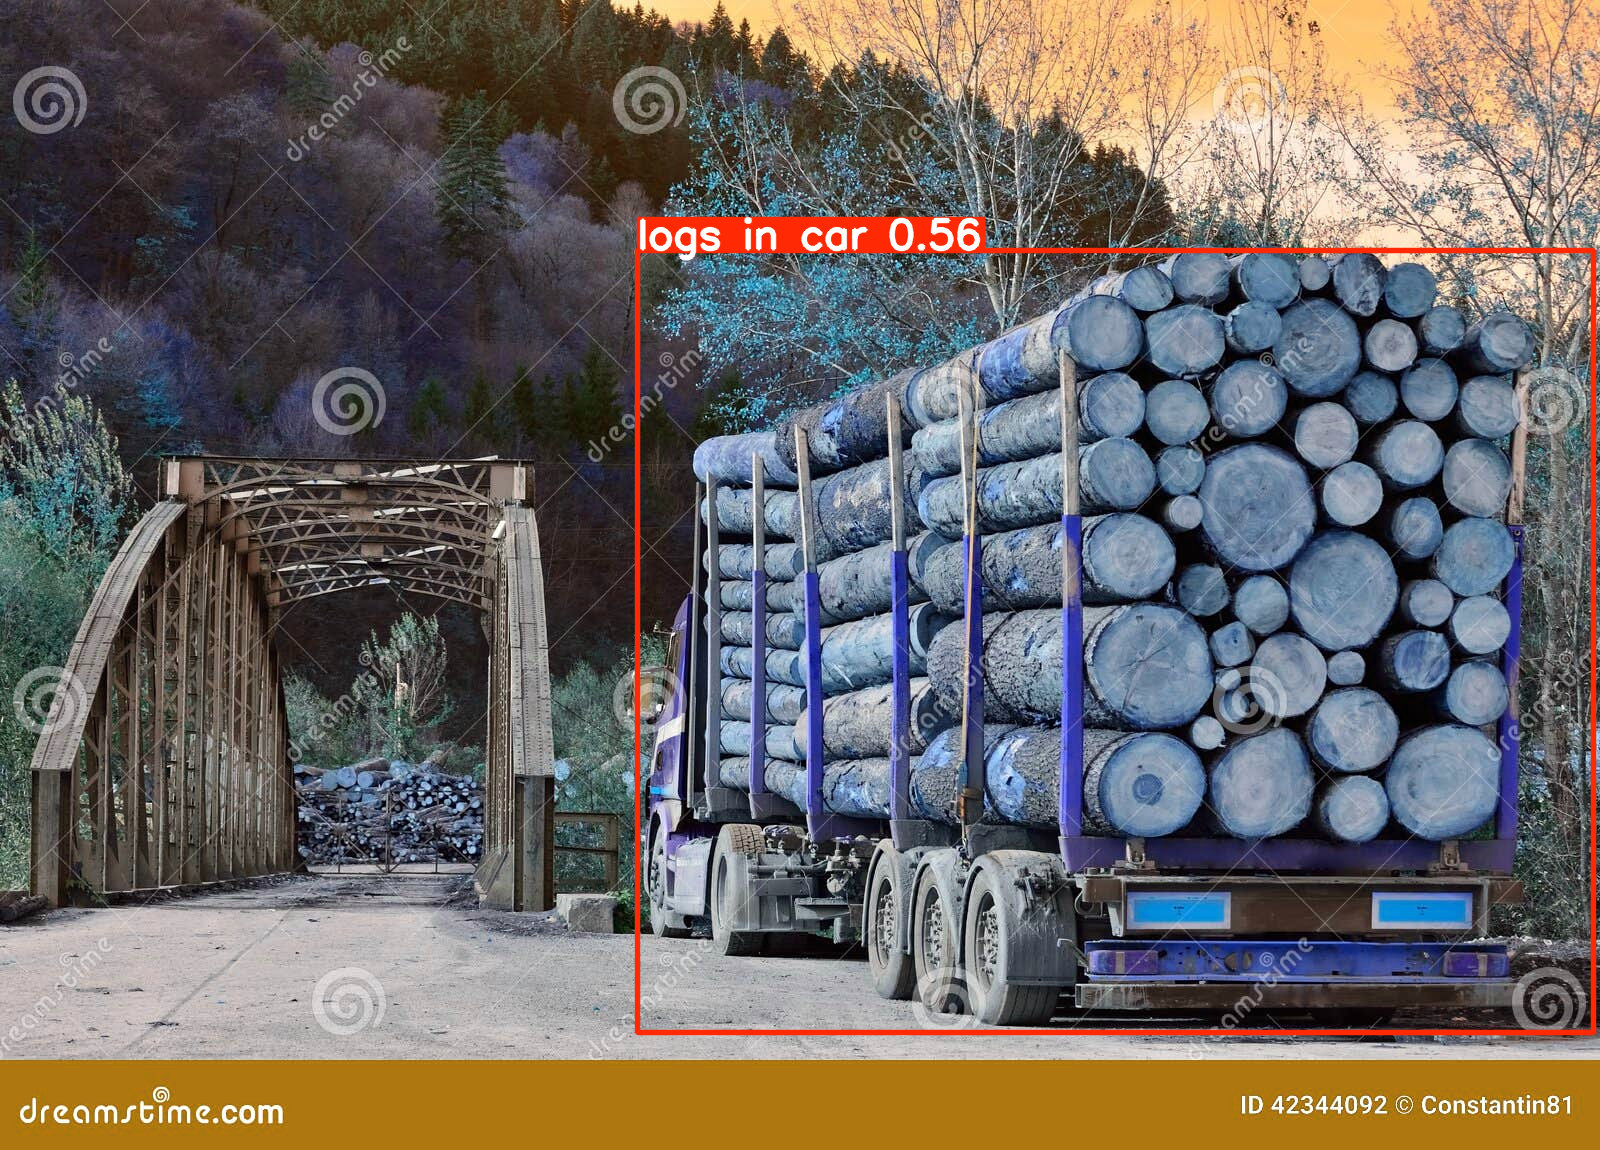

Переключение на CPU для оценки производительности...

image 1/1 /Users/margogusarova/Documents/DL_workspace/Search_model/img/4.jpg: 480x640 (no detections), 331.9ms
Speed: 5.4ms preprocess, 331.9ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)
Время инференса на CPU: 0.6449 секунд

Исследование завершено.
Ключевые метрики:
- Время инференса на GPU: 1.0649 секунд
- Время инференса на CPU: 0.6449 секунд


In [114]:
image_path = "img/4.jpg"
labels = ["logs in car"]
YOLO_world_det(image_path, labels)


Используемое устройство: cpu

image 1/1 /Users/margogusarova/Documents/DL_workspace/Search_model/img/1702628881587.jpg: 640x480 2 balls, 452.6ms
Speed: 4.1ms preprocess, 452.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Время инференса: 1.1925 секунд на cpu


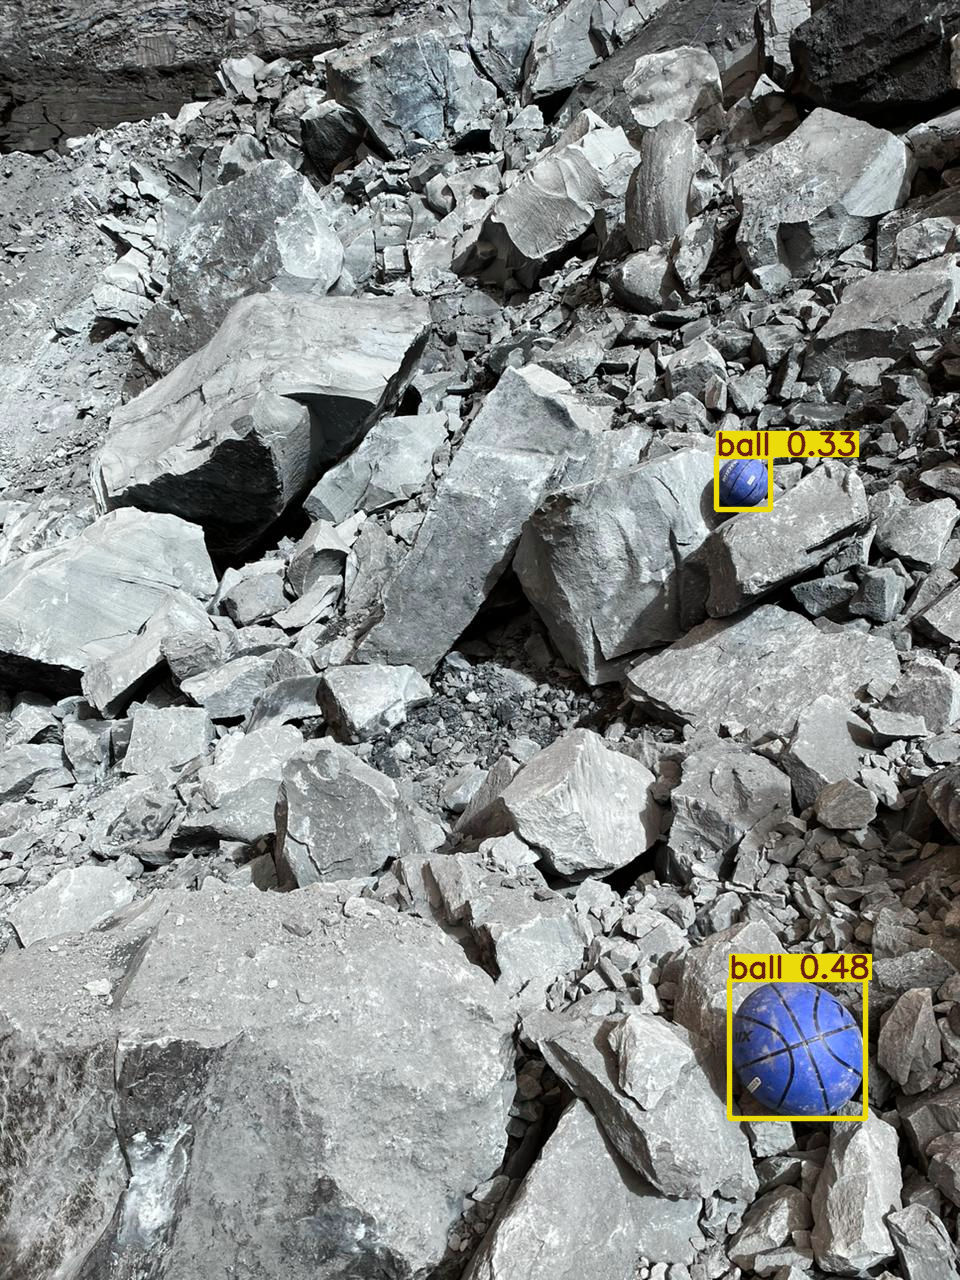

Переключение на CPU для оценки производительности...

image 1/1 /Users/margogusarova/Documents/DL_workspace/Search_model/img/1702628881587.jpg: 640x480 2 balls, 602.3ms
Speed: 5.3ms preprocess, 602.3ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 480)
Время инференса на CPU: 0.9533 секунд

Исследование завершено.
Ключевые метрики:
- Время инференса на GPU: 1.1925 секунд
- Время инференса на CPU: 0.9533 секунд


In [117]:
image_path = "img/1702628881587.jpg"
labels = ["stone", "ball"]
YOLO_world_det(image_path, labels)